In [1471]:
import pandas as pd
import pandas as pd
import ast
from sklearn.preprocessing import OneHotEncoder
import numpy as np


In [1472]:
df = pd.read_csv('data.csv')

df_artist = pd.read_csv('data_w_genres.csv')
df_genre = pd.read_csv('data_by_genres.csv')
df_year = pd.read_csv('data_by_year.csv')
df_artists = pd.read_csv('data_by_artist.csv')

In [1473]:

df_key = df[['key']]
df_key_onehot = OneHotEncoder(dtype=np.int8).fit_transform(df_key).toarray()

In [1474]:
df.drop(['key'], axis=1, inplace=True)
key_indices = [f'key_{i}' for i in range(12)]
print(key_indices)

['key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11']


In [1475]:
df = df.join(pd.DataFrame(df_key_onehot, columns=key_indices))


In [1476]:
df.head()


,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,['Love'],220560,11/1/66,1966,0.5250,0.600,0.540,0.00305,...,0,0,0,0,0,0,0,1,0,0
1,0tMgFpOrXZR6irEOLNWwJL,"""40""",['U2'],157840,2/28/83,1983,0.2280,0.368,0.480,0.70700,...,0,0,0,0,0,0,1,0,0,0
2,2ZywW3VyVx6rrlrX75n3JB,"""40"" - Live",['U2'],226200,8/20/83,1983,0.0998,0.272,0.684,0.01450,...,0,0,0,0,0,0,1,0,0,0
3,6DdWA7D1o5TU2kXWyCLcch,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,...,0,0,0,0,0,0,1,0,0,0
4,3vMmwsAiLDCfyc1jl76lQE,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,...,0,0,0,0,0,0,1,0,0,0


In [1477]:
df_mode = df[['mode']]
df_mode_onehot = OneHotEncoder(dtype=np.int8).fit_transform(df_mode).toarray()

In [1478]:
df.drop(['mode'], axis=1, inplace=True)
df = df.join(pd.DataFrame(df_mode_onehot, columns=['minor', 'major']))


In [1479]:
df2 = df.copy()

In [1480]:
df_artist_key = df_artist[['key']]
df_artist_key_onehot = OneHotEncoder(dtype=np.int8).fit_transform(df_artist_key).toarray()
df_artist.drop(['key'], axis=1, inplace=True)

In [1481]:
len(df_artist_key_onehot)


32539

In [1482]:
df_artist = df_artist.join(pd.DataFrame(df_artist_key_onehot, columns=key_indices))


In [1483]:
df_artist_mode = df_artist[['mode']]
df_artist_mode_onehot = OneHotEncoder(dtype=np.int8).fit_transform(df_artist_mode).toarray()

In [1484]:
df_artist.drop(['mode'], axis=1, inplace=True)
df_artist = df_artist.join(pd.DataFrame(df_artist_mode_onehot, columns=['minor', 'major']))

In [1485]:
df_artist.head()


,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,minor,major
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,...,0,1,0,0,0,0,0,0,0,1
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,...,0,1,0,0,0,0,0,0,0,1
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,...,0,0,0,0,0,0,0,0,0,1
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,...,0,0,0,0,0,0,0,0,0,1
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,...,0,1,0,0,0,0,0,0,0,1


In [1486]:
df_artist[['genres']].describe()


,genres
count,32539
unique,10841
top,[]
freq,13563


In [1487]:
df_genre_key = df_genre[['key']]
df_genre_key_onehot = OneHotEncoder(dtype=np.int8).fit_transform(df_genre_key).toarray()
df_genre.drop(['key'], axis=1, inplace=True)
df_genre = df_genre.join(pd.DataFrame(df_genre_key_onehot, columns=key_indices))

In [1488]:
df_genre.head()


,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,...,0,0,1,0,0,0,0,0,0,0
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,...,0,0,0,0,0,0,0,0,0,1
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,...,0,0,0,1,0,0,0,0,0,0
3,[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,...,0,0,0,0,0,1,0,0,0,0
4,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,...,0,0,0,0,0,1,0,0,0,0


In [1489]:
df_artist = df_artist.join(df_genre.set_index('genres'), on='genres', rsuffix='_gr')


In [1490]:
df['artists'] = df['artists'].apply(ast.literal_eval)
df = df.explode('artists')
df_artist = df_artist.set_index('artists')
df.tail(25)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,minor,major
169884,5hcO4JPFMFgQ5edWGhhhaG,괴도 (Danger),TAEMIN,191453,8/19/14,2014,0.02950,0.732,0.743,0.000000,...,0,0,0,0,0,0,0,0,0,1
169885,3Al8ZAfFrZshzgTI6IPeF1,깊은 밤을 날아서,Lee Moon Sae,182867,3/10/87,1987,0.63700,0.649,0.685,0.000139,...,0,0,0,0,0,0,0,0,0,1
169886,2p5TdDBoY6eEvTQuzyurTV,너의 의미 The Meaning of Yoy,Sanullim,223293,7/20/84,1984,0.47000,0.572,0.125,0.066900,...,1,0,0,0,0,0,0,0,1,0
169887,4qzBepJAKtYu4T1GDtBZZc,"눈,코,입 (Eyes, Nose, Lips)",TAEYANG,229990,6/13/14,2014,0.73800,0.631,0.516,0.000000,...,0,0,0,0,0,0,0,0,0,1
169888,72HYwYmfl6Y8AzbJO0z6vB,니가 하면 If You Do,GOT7,210834,11/23/15,2015,0.05570,0.692,0.886,0.000000,...,0,0,0,0,1,0,0,0,0,1
169889,0GU5GuJQQEnnREO2FxnVPT,달라달라 (DALLA DALLA),ITZY,199874,2/12/19,2019,0.00116,0.790,0.853,0.000042,...,0,0,0,0,0,0,0,1,1,0
169890,4ER58qECydWokIsgqtysWu,딱 좋아(Just right),GOT7,222399,7/13/15,2015,0.23300,0.760,0.781,0.000000,...,0,0,0,0,0,0,0,1,1,0
169891,5HiSc2ZCGn8L3cH3qSwzBT,러시안 룰렛 Russian Roulette,Red Velvet,211244,9/7/16,2016,0.05500,0.726,0.903,0.000225,...,0,0,0,1,0,0,0,0,1,0
169892,4mwzUFtpBHJVyBs16YjjPN,몸매 Mommae (feat. Ugly Duck),Jay Park,204327,11/5/15,2015,0.21800,0.745,0.669,0.000000,...,0,0,0,0,0,1,0,0,1,0
169892,4mwzUFtpBHJVyBs16YjjPN,몸매 Mommae (feat. Ugly Duck),Ugly Duck,204327,11/5/15,2015,0.21800,0.745,0.669,0.000000,...,0,0,0,0,0,1,0,0,1,0


In [1491]:
df = df.join(df_artist, on='artists', rsuffix='_ar')


In [1492]:
df.columns


Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'explicit', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'minor',
       'major', 'acousticness_ar', 'danceability_ar', 'duration_ms_ar',
       'energy_ar', 'instrumentalness_ar', 'liveness_ar', 'loudness_ar',
       'speechiness_ar', 'tempo_ar', 'valence_ar', 'popularity_ar', 'count',
       'genres', 'key_0_ar', 'key_1_ar', 'key_2_ar', 'key_3_ar', 'key_4_ar',
       'key_5_ar', 'key_6_ar', 'key_7_ar', 'key_8_ar', 'key_9_ar', 'key_10_ar',
       'key_11_ar', 'minor_ar', 'major_ar', 'acousticness_gr',
       'danceability_gr', 'duration_ms_gr', 'energy_gr', 'instrumentalness_gr',
       'liveness_gr', 'loudness_gr', 'speechiness_gr', 'tempo_gr',
       'valence_gr', 'popularity_gr', 'mode', 

In [1493]:
df.tail()


,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,...,key_2_gr,key_3_gr,key_4_gr,key_5_gr,key_6_gr,key_7_gr,key_8_gr,key_9_gr,key_10_gr,key_11_gr
169903,42tFTth2jcF7iSo0RBjfJF,피카부 Peek-A-Boo,Red Velvet,189050,11/17/17,2017,0.0868,0.839,0.902,0.002570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169904,6XP9L7di5JnOc9WaeAW8oe,행복 (Happiness),Red Velvet,220987,8/1/14,2014,0.3230,0.727,0.871,0.000006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169905,3Gpdzw72aBVJSrm5J1leVK,"헤어지지 못하는 여자, 떠나가지 못하는 남자 Can't Breakup Girl, C...",Leessang,284627,10/6/09,2009,0.1500,0.523,0.841,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169905,3Gpdzw72aBVJSrm5J1leVK,"헤어지지 못하는 여자, 떠나가지 못하는 남자 Can't Breakup Girl, C...",Jung In,284627,10/6/09,2009,0.1500,0.523,0.841,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169906,2p5DfmIUTLH79elmaSCCR5,화려하지 않은 고백 Confession Is Not Flashy,LEE SEUNG HWAN,230733,9/1/93,1993,0.4480,0.741,0.380,0.000811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1494]:
id_group = df.groupby('id')



In [1495]:
df_group = id_group.agg({
    # Track Attributes
    "acousticness" : ["first"],
    "danceability" : ["first"],
    "duration_ms" : ["first"],
    "energy" : ["first"],
    "explicit" : ["first"],
    "instrumentalness" : ["first"],
    "liveness" : ["first"],
    "loudness" : ["first"],
    "popularity" : ["first"],
    "speechiness" : ["first"],
    "tempo" : ["first"],
    "valence" : ["first"],
    "year" : ["first"],
    "key_0" : ["first"],
    "key_1" : ["first"],
    "key_2" : ["first"],
    "key_3" : ["first"],
    "key_4" : ["first"],
    "key_5" : ["first"],
    "key_6" : ["first"],
    "key_7" : ["first"],
    "key_8" : ["first"],
    "key_9" : ["first"],
    "key_10" : ["first"],
    "key_11" : ["first"],
    "minor" : ["first"],
    "major" : ["first"],
    # Artist Attributes
    "acousticness_ar" : ["mean"],
    "danceability_ar" : ["mean"],
    "duration_ms_ar" : ["mean"],
    "energy_ar" : ["max"],
    "instrumentalness_ar" : ["max"],
    "liveness_ar" : ["max"],
    "loudness_ar" : ["mean"],
    "speechiness_ar" : ["mean"],
    "tempo_ar" : ["mean"],
    "valence_ar" : ["mean"],
    "popularity_ar" : ["max"],
    "count" : ["max"], # Doubtful, needs to be checked
    "key_0_ar" : ["first"],
    "key_1_ar" : ["first"],
    "key_2_ar" : ["first"],
    "key_3_ar" : ["first"],
    "key_4_ar" : ["first"],
    "key_5_ar" : ["first"],
    "key_6_ar" : ["first"],
    "key_7_ar" : ["first"],
    "key_8_ar" : ["first"],
    "key_9_ar" : ["first"],
    "key_10_ar" : ["first"],
    "key_11_ar" : ["first"],
    "minor_ar" : ["max"],
    "major_ar" : ["max"],
})

In [1496]:
type(id_group)


pandas.core.groupby.generic.DataFrameGroupBy

In [1497]:
df.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'explicit', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'minor',
       'major', 'acousticness_ar', 'danceability_ar', 'duration_ms_ar',
       'energy_ar', 'instrumentalness_ar', 'liveness_ar', 'loudness_ar',
       'speechiness_ar', 'tempo_ar', 'valence_ar', 'popularity_ar', 'count',
       'genres', 'key_0_ar', 'key_1_ar', 'key_2_ar', 'key_3_ar', 'key_4_ar',
       'key_5_ar', 'key_6_ar', 'key_7_ar', 'key_8_ar', 'key_9_ar', 'key_10_ar',
       'key_11_ar', 'minor_ar', 'major_ar', 'acousticness_gr',
       'danceability_gr', 'duration_ms_gr', 'energy_gr', 'instrumentalness_gr',
       'liveness_gr', 'loudness_gr', 'speechiness_gr', 'tempo_gr',
       'valence_gr', 'popularity_gr', 'mode', 

In [1498]:
df.tail(15)


,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,...,key_2_gr,key_3_gr,key_4_gr,key_5_gr,key_6_gr,key_7_gr,key_8_gr,key_9_gr,key_10_gr,key_11_gr
169893,6DVq2uRrYyQfChAlsTJ11g,비처럼 음악처럼,Kim Hyunshik,277580,12/1/86,1986,0.0496,0.430,0.338,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169894,7nKQ5WAcjnG48knyLuo8gO,빨간 맛 Red Flavor,Red Velvet,191139,7/9/17,2017,0.0409,0.709,0.917,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169895,1XwAV7ty94aIJgRXP7CETn,사랑이 지나가면,Lee Moon Sae,253240,3/10/87,1987,0.7670,0.308,0.286,0.000746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169896,5hHlmrSV6d9LFMsDA1lamE,소방차 Fire Truck,NCT 127,178565,7/10/16,2016,0.1160,0.724,0.976,0.000013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169897,5w18nowVMRZrC5Na9Vxoth,"쏘리 쏘리 Sorry, Sorry",SUPER JUNIOR,232333,3/11/09,2009,0.0226,0.706,0.972,0.000003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169898,1uRB9bYGCSvLSsF4e65UYj,아로하,Cool,265379,4/19/04,2004,0.5160,0.529,0.754,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169899,4pi0Elz7B7cLfw37J3bYm9,으르렁 Growl,EXO,207053,8/5/13,2013,0.1450,0.681,0.814,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169900,2ujA6F1cpk3m8lsPE5aKua,전야 前夜 The Eve,EXO,176026,7/18/17,2017,0.0223,0.636,0.702,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169901,5NSPsOGVNWYOMeeyZPF7HY,중독 Overdose,EXO-K,205612,8/6/14,2014,0.0615,0.498,0.917,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169902,4KiYPYpm4ultIp247ftPlI,텅 빈 마음 Empty Heart,LEE SEUNG HWAN,249893,10/15/89,1989,0.4290,0.547,0.304,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1499]:
df = df.join(df_artist, on='artists', rsuffix='_ar')

In [1500]:
df['artists'] = df['artists'].map(lambda x : x[0])


In [1501]:
df.iloc[:,19]
count_nan = len(df.iloc[:,19]) - df.iloc[:,19].count()
print(len(df), count_nan)

225454 0


In [1502]:
df.dropna(inplace=True)

In [1503]:
df.iloc[:,19]


8         0
9         0
9         0
10        0
10        0
         ..
169790    0
169802    0
169803    0
169806    0
169815    1
Name: key_2, Length: 28591, dtype: int8

In [1504]:
count_nan = len(df.iloc[:,19]) - df.iloc[:,19].count()
print(count_nan)

0


In [1505]:
df_year.head()


,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1


In [1506]:
df_year[['key']].describe()


,key
count,102.000000
mean,3.794118
std,3.518940
min,0.000000
25%,0.000000
50%,2.000000
75%,7.000000
max,10.000000


In [1507]:
df_year_key = df_year[['key']]
df_year_key_onehot = OneHotEncoder(dtype=np.int8).fit_transform(df_year_key).toarray()


In [1508]:
df_year_key_onehot[:5]


array([[0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1]], dtype=int8)

In [1509]:
df_year.drop(['key'], axis=1, inplace=True)


In [1510]:
df_year = df_year.join(pd.DataFrame(df_year_key_onehot, columns=key_indices[:len(df_year_key_onehot[0])]))


In [1511]:
df_year_mode = df_year[['mode']]
df_year_mode_onehot = OneHotEncoder(dtype=np.int8).fit_transform(df_year_mode).toarray()

In [1512]:
df_year_mode_onehot[0]

array([1], dtype=int8)

In [1513]:
df_year.head()


,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,mode,key_0,key_1,key_2,key_3,key_4,key_5,key_6
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,1,0,0,1,0,0,0,0
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,1,0,0,1,0,0,0,0
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,1,0,0,0,1,0,0,0
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,1,1,0,0,0,0,0,0
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,1,0,0,0,0,0,0,1


In [1514]:

df = df_group.copy()
df.columns = df_group.columns.droplevel(1)

In [1515]:
df.columns


Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness',
       'tempo', 'valence', 'year', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4',
       'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11',
       'minor', 'major', 'acousticness_ar', 'danceability_ar',
       'duration_ms_ar', 'energy_ar', 'instrumentalness_ar', 'liveness_ar',
       'loudness_ar', 'speechiness_ar', 'tempo_ar', 'valence_ar',
       'popularity_ar', 'count', 'key_0_ar', 'key_1_ar', 'key_2_ar',
       'key_3_ar', 'key_4_ar', 'key_5_ar', 'key_6_ar', 'key_7_ar', 'key_8_ar',
       'key_9_ar', 'key_10_ar', 'key_11_ar', 'minor_ar', 'major_ar'],
      dtype='object')

In [1516]:
df = df.join(df_year.set_index('year'), rsuffix='_yr', on='year')


In [1517]:
df.dropna(inplace=True)


In [1518]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness',
       'tempo', 'valence', 'year', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4',
       'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11',
       'minor', 'major', 'acousticness_ar', 'danceability_ar',
       'duration_ms_ar', 'energy_ar', 'instrumentalness_ar', 'liveness_ar',
       'loudness_ar', 'speechiness_ar', 'tempo_ar', 'valence_ar',
       'popularity_ar', 'count', 'key_0_ar', 'key_1_ar', 'key_2_ar',
       'key_3_ar', 'key_4_ar', 'key_5_ar', 'key_6_ar', 'key_7_ar', 'key_8_ar',
       'key_9_ar', 'key_10_ar', 'key_11_ar', 'minor_ar', 'major_ar',
       'acousticness_yr', 'danceability_yr', 'duration_ms_yr', 'energy_yr',
       'instrumentalness_yr', 'liveness_yr', 'loudness_yr', 'speechiness_yr',
       'tempo_yr', 'valence_yr', 'popularity_yr', 'mode', 'key_0_yr',
       'key_1_yr', 'key_2_yr', 'key_3_yr', 'ke

In [1519]:
dfml = df.copy()

In [1520]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
from imblearn.over_sampling import SMOTE


In [1521]:

mean_popularity = 50




dfml["popularity"] = [ 1 if i >= mean_popularity else 0 for i in dfml.popularity ]




# # Define popularity classes
# def popularity_class(p):
#     if 0 <= p and p <= 33:
#         return 0
#     elif 33 < p and p <= 66:
#         return 1
#     else:
#         return 2

# # Apply the function to create the popularity classes
# dfml["popularity_class"] = dfml["popularity"].apply(popularity_class)

#dfml = dfml.drop(['popularity'], axis=1)

In [1522]:
dfml[dfml["popularity"] == 0 ].shape

(128261, 72)

In [1523]:
dfml[dfml["popularity"] == 1 ].shape

(36398, 72)

In [1524]:
dfml[dfml["popularity"] == 2 ].shape

(0, 72)

In [1525]:
X  = dfml.drop(['popularity'], axis=1)
y = dfml['popularity']

In [1526]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=42)


In [1527]:

# sm = SMOTE(random_state=27, sampling_strategy='auto')
# X_train, y_train = sm.fit_resample(X_train, y_train)



from imblearn.over_sampling import ADASYN
from collections import Counter

# assuming X is your feature set and y is the target variable
adasyn = ADASYN(sampling_strategy='minority',random_state=42)
X_train, y_train = adasyn.fit_resample(X_train, y_train)

print('Original dataset shape %s' % Counter(y))




Original dataset shape Counter({0: 128261, 1: 36398})


In [1528]:
print('Resampled dataset shape %s' % Counter(y_train))


Resampled dataset shape Counter({1: 110268, 0: 102609})


In [1529]:
tree_reg = DecisionTreeClassifier()
tree_reg.fit(X_train, y_train)

DecisionTreeClassifier()

In [1530]:
y_pred_train = tree_reg.predict(X_train)


In [1531]:
r2_score(y_train, y_pred_train)


0.9932079481839537

In [1532]:
y_pred = tree_reg.predict(X_test)


In [1533]:
r2_score(y_test, y_pred)


0.026746688131765395

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     25652
           1       0.61      0.66      0.64      7280

    accuracy                           0.83     32932
   macro avg       0.76      0.77      0.76     32932
weighted avg       0.84      0.83      0.83     32932



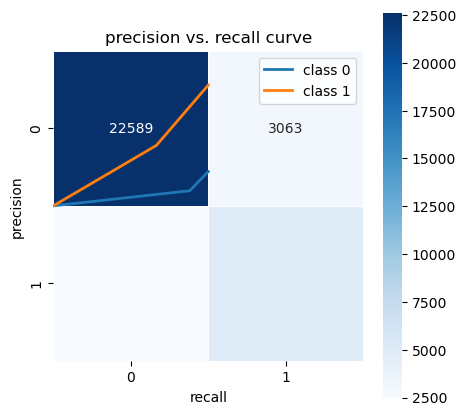

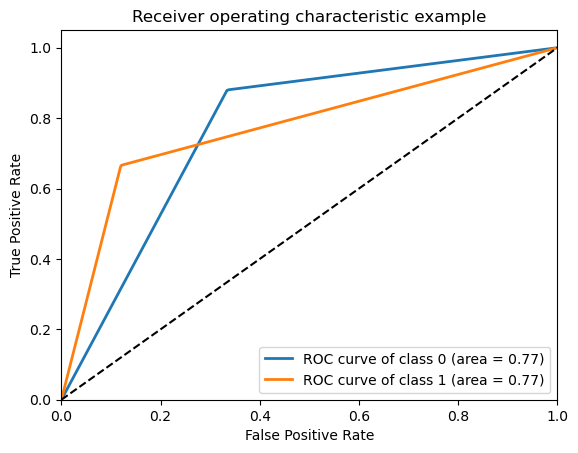

In [1534]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# assuming clf is your trained classifier and X_test, y_test are your testing data
#y_pred = clf.predict(X_test)
y_score = tree_reg.predict_proba(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Define number of classes
n_classes = len(np.unique(y_test))

# Plot Precision-Recall curve for each class
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

# Plot ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [1459]:
# criterion = ['gini', 'entropy']
max_depth = [10,15]
min_samples_split = [6,8]
min_samples_leaf = [5,6,7,8]

In [1460]:
parameters=dict(max_depth=max_depth,
               min_samples_split=min_samples_split,
               min_samples_leaf=min_samples_leaf)

In [1461]:
tree_reg_gs = GridSearchCV(tree_reg, parameters)
tree_reg_gs.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 15],
                         'min_samples_leaf': [5, 6, 7, 8],
                         'min_samples_split': [6, 8]})

In [1462]:
print('Best max_depth:', tree_reg_gs.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', tree_reg_gs.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', tree_reg_gs.best_estimator_.get_params()['min_samples_leaf'])


Best max_depth: 15
Best min_samples_split: 6
Best min_samples_leaf: 6


In [1463]:
y_pred_train = tree_reg_gs.predict(X_train)
r2_score(y_train, y_pred_train)

0.7117423105993237

In [1464]:
y_pred = tree_reg_gs.predict(X_test)
r2_score(y_test, y_pred)

0.18422362371762036

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     25652
           1       0.68      0.69      0.68      7280

    accuracy                           0.86     32932
   macro avg       0.80      0.80      0.80     32932
weighted avg       0.86      0.86      0.86     32932



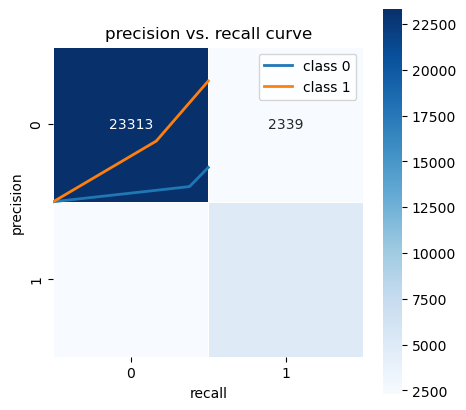

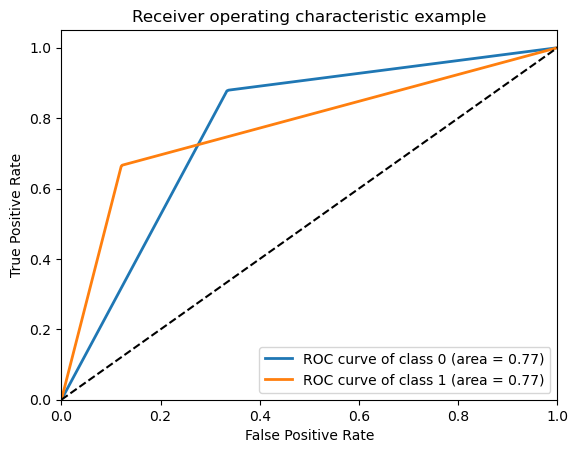

In [1465]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# assuming clf is your trained classifier and X_test, y_test are your testing data
#y_pred = clf.predict(X_test)
y_score = tree_reg.predict_proba(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Define number of classes
n_classes = len(np.unique(y_test))

# Plot Precision-Recall curve for each class
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

# Plot ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [1467]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/03/e6/4aef6799badc2693548559bad5b56d56cfe89eada337c815fdfe92175250/xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.4 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


In [1470]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and you have defined your target variable y
# X = df.drop('target', axis=1)
# y = df['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the dataset into an optimized data structure called Dmatrix that XGBoost supports
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for the XGBRegressor
params = {
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': 0.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'reg:squarederror',
}

# Define the number of boosting rounds
num_boost_round = 999

# Train the model with early stopping
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=1000
)

print("Best RMSE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))


[0]	Test-rmse:0.35784
[1]	Test-rmse:0.32534
[2]	Test-rmse:0.30782
[3]	Test-rmse:0.29867
[4]	Test-rmse:0.29359
[5]	Test-rmse:0.29103
[6]	Test-rmse:0.28952
[7]	Test-rmse:0.28857
[8]	Test-rmse:0.28796
[9]	Test-rmse:0.28753
[10]	Test-rmse:0.28728
[11]	Test-rmse:0.28701
[12]	Test-rmse:0.28678
[13]	Test-rmse:0.28659
[14]	Test-rmse:0.28657
[15]	Test-rmse:0.28633
[16]	Test-rmse:0.28630
[17]	Test-rmse:0.28620
[18]	Test-rmse:0.28615
[19]	Test-rmse:0.28599
[20]	Test-rmse:0.28587
[21]	Test-rmse:0.28597
[22]	Test-rmse:0.28584
[23]	Test-rmse:0.28579
[24]	Test-rmse:0.28555
[25]	Test-rmse:0.28547
[26]	Test-rmse:0.28545
[27]	Test-rmse:0.28549
[28]	Test-rmse:0.28556
[29]	Test-rmse:0.28547
[30]	Test-rmse:0.28545
[31]	Test-rmse:0.28535
[32]	Test-rmse:0.28524
[33]	Test-rmse:0.28529
[34]	Test-rmse:0.28533
[35]	Test-rmse:0.28532
[36]	Test-rmse:0.28526
[37]	Test-rmse:0.28519
[38]	Test-rmse:0.28515
[39]	Test-rmse:0.28514
[40]	Test-rmse:0.28504
[41]	Test-rmse:0.28505
[42]	Test-rmse:0.28507
[43]	Test-rmse:0.2850